# Training Encoder decoder lstm with Method 2

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os

In [62]:
# get data
# df= pd.read_csv("/content/cleaned.csv")

In [63]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [64]:
!wget https://github.com/Adwait01-Bhosale/texttotext/blob/master/Hindi_English_Truncated_Corpus.csv?raw=true

--2021-11-20 04:57:24--  https://github.com/Adwait01-Bhosale/texttotext/blob/master/Hindi_English_Truncated_Corpus.csv?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Adwait01-Bhosale/texttotext/raw/master/Hindi_English_Truncated_Corpus.csv [following]
--2021-11-20 04:57:25--  https://github.com/Adwait01-Bhosale/texttotext/raw/master/Hindi_English_Truncated_Corpus.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Adwait01-Bhosale/texttotext/master/Hindi_English_Truncated_Corpus.csv [following]
--2021-11-20 04:57:25--  https://raw.githubusercontent.com/Adwait01-Bhosale/texttotext/master/Hindi_English_Truncated_Corpus.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133,

In [65]:
df=pd.read_csv("/content/Hindi_English_Truncated_Corpus.csv?raw=true",encoding='utf-8')

In [66]:
df.head()

,source,english_sentence,hindi_sentence
0,ted,politicians do not have permission to do what needs to be done.,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह करने कि अनुमति नहीं है ."
1,ted,"I'd like to tell you about one such child,","मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहूंगी,"
2,indic2012,This percentage is even greater than the percentage in India.,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3,ted,what we really mean is that they're bad at not paying attention.,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4,indic2012,.The ending portion of these Vedas is called Upanishad.,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।


In [67]:
# df=df.drop('source',axis=1)

In [68]:
df['source'].value_counts()

tides        50000
ted          39881
indic2012    37726
Name: source, dtype: int64

In [69]:
df=df[df['source']=='ted']

In [70]:
pd.isnull(df).sum()

source              0
english_sentence    0
hindi_sentence      0
dtype: int64

In [71]:
df=df[~pd.isnull(df['english_sentence'])]

In [72]:
df.drop_duplicates(inplace=True)

In [73]:
df['english_sentence']=df['english_sentence'].apply(lambda x: x.lower())
df['hindi_sentence']=df['hindi_sentence'].apply(lambda x: x.lower())

In [74]:
df = df.rename(columns = {'english_sentence': 'English', 'hindi_sentence': 'Marathi'}, inplace = False)

In [75]:
df.tail()

,source,English,Marathi
127592,ted,because when you are a developing country,क्योंकि जब आप एक विकासशील देश हैं
127595,ted,is if we want that to become our reality -,अगर हम चाहते हैं कि यह वास्तविकता बने -
127597,ted,africa has not done bad.,अफ़्रीका ने कुछ गलती नहीं की है।
127603,ted,and put it in our cheeks.,और अपने गालों में डाल लेते हैं।
127606,ted,"they've just won four government contracts to build off their 100 ambulances,","हाल ही में उन्हें सरकारी ठेका मिला है करीब सौ नई अम्बुलेन्स बनाने का,"


In [76]:
# df2 = {'English': 'This is an apple', 'Marathi': 'हे सफरचंद आहे'}
# df = df.append(df2, ignore_index = True)

In [77]:
df.tail()

,source,English,Marathi
127592,ted,because when you are a developing country,क्योंकि जब आप एक विकासशील देश हैं
127595,ted,is if we want that to become our reality -,अगर हम चाहते हैं कि यह वास्तविकता बने -
127597,ted,africa has not done bad.,अफ़्रीका ने कुछ गलती नहीं की है।
127603,ted,and put it in our cheeks.,और अपने गालों में डाल लेते हैं।
127606,ted,"they've just won four government contracts to build off their 100 ambulances,","हाल ही में उन्हें सरकारी ठेका मिला है करीब सौ नई अम्बुलेन्स बनाने का,"


This data is cleaned in notebook of [EDA](https://github.com/AdiShirsath/Neural-Machine-Translation/blob/master/EDA_And_Cleaning_Text.ipynb)

#### First most important thing is we have to add special tokens in each target language at start SOS and EOS at end reason of this is The length of translated sentence might not be same as other language so it is to tell model where is start and end of sentence.

In [78]:
df.Marathi = df.Marathi.apply(lambda x: 'sos '+ x +' eos')

In [79]:
# get english and marathi in one list
eng_texts = df.English
mar_texts = df.Marathi

In [80]:
sent=["This is an apple"]
sent=np.asarray(sent)

## Tokenizer
Deep learning NN's does not accept text so first have to convert them into numbers 

In [81]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [82]:
def tokenize_sent(text):
  '''
  Take list on texts as input and 
  returns its tokenizer and enocded text
  '''
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(text)

  return tokenizer, tokenizer.texts_to_sequences(text)



In [83]:
eng_tokenizer, eng_encoded= tokenize_sent(text= eng_texts)
mar_tokenizer, mar_encoded= tokenize_sent(text= mar_texts)

In [84]:
eng_encoded[100:105]

[[2, 8, 175, 1009, 9266, 2718, 5, 117],
 [7, 1, 2143, 67, 11, 63, 1686, 41, 185, 9, 176, 359, 5392, 90, 12],
 [10, 25, 794, 23, 52, 18, 274, 88, 81, 2016],
 [16, 65, 21, 10, 187, 196, 5, 1219, 394],
 [6, 11, 700, 154, 4505]]

In [85]:
eng_index_word = eng_tokenizer.index_word

In [86]:
ENG_VOCAB_SIZE = len(eng_tokenizer.word_counts)+1
ENG_VOCAB_SIZE

16579

In [87]:
mar_encoded[30000:30005]

[[1, 378, 75, 1505, 9, 19492, 5, 364, 19493, 928, 2],
 [1, 1529, 5, 632, 5, 332, 3044, 2],
 [1,
  48,
  89,
  3811,
  20,
  557,
  3140,
  579,
  3874,
  8,
  2617,
  9,
  4881,
  574,
  2491,
  398,
  1139,
  91,
  157,
  50,
  2],
 [1, 20, 19494, 501, 100, 101, 25, 1482, 5, 27, 2],
 [1, 37, 79, 1169, 354, 9, 357, 5, 3663, 59, 3, 2]]

In [88]:
mar_index_word= mar_tokenizer.index_word

In [89]:
mar_word_index =mar_tokenizer.word_index

In [90]:
MAR_VOCAB_SIZE=len(mar_tokenizer.word_counts)+1
MAR_VOCAB_SIZE

22088

In [91]:
max_eng_len = 0
for i in range(len(eng_encoded)):
  if len(eng_encoded[i]) > max_eng_len:
    max_eng_len= len(eng_encoded[i])

max_mar_len = 0
for i in range(len(mar_encoded)):
  if len(eng_encoded[i]) > max_mar_len:
    max_mar_len= len(mar_encoded[i])


In [92]:
print(max_eng_len)
max_mar_len

21


23

## Padding 
We can not sent sentences with different length in neural net so padd them with zero 

In [93]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [94]:
# Use max length for padding for eng and marathi
eng_padded = pad_sequences(eng_encoded, maxlen=max_eng_len, padding='post')
mar_padded = pad_sequences(mar_encoded, maxlen=max_mar_len, padding='post')

In [95]:
eng_padded.shape

(38803, 21)

In [96]:
mar_padded.shape

(38803, 23)

In [97]:
# Convert them into array
eng_padded= np.array(eng_padded)
mar_padded= np.array(mar_padded)

### Split into train and test

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(eng_padded, mar_padded, test_size=0.1, random_state=0)

In [100]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34922, 21), (3881, 21), (34922, 23), (3881, 23))

## Model

In [101]:
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding, Bidirectional, Add, Concatenate, Dropout
from tensorflow.keras import Input, Model

In [102]:
# Eoncoder
encoder_input = Input(shape=(None, ))
encoder_embd = Embedding(ENG_VOCAB_SIZE,512, mask_zero=True)(encoder_input)
encoder_lstm = Bidirectional(LSTM(256, return_state=True))
encoder_output, forw_state_h, forw_state_c, back_state_h, back_state_c = encoder_lstm(encoder_embd)
state_h_final = Concatenate()([forw_state_h, back_state_h])
state_c_final = Concatenate()([forw_state_c, back_state_c])

## Now take only states and create context vector
encoder_states= [state_h_final, state_c_final]

# Decoder
decoder_input = Input(shape=(None,))
# For zero padding we have added +1 in marathi vocab size
decoder_embd = Embedding(MAR_VOCAB_SIZE, 512, mask_zero=True)
decoder_embedding= decoder_embd(decoder_input)
# We used bidirectional layer above so we have to double units of this lstm
decoder_lstm = LSTM(512, return_state=True,return_sequences=True )
# just take output of this decoder dont need self states
decoder_outputs, _, _= decoder_lstm(decoder_embedding, initial_state=encoder_states)
# here this is going to predicct so we can add dense layer here
# here we want to convert predicted numbers into probability so use softmax
decoder_dense= Dense(MAR_VOCAB_SIZE, activation='softmax')
# We will again feed predicted output into decoder to predict its next word
decoder_outputs = decoder_dense(decoder_outputs)

model5 = Model([encoder_input, decoder_input], decoder_outputs)

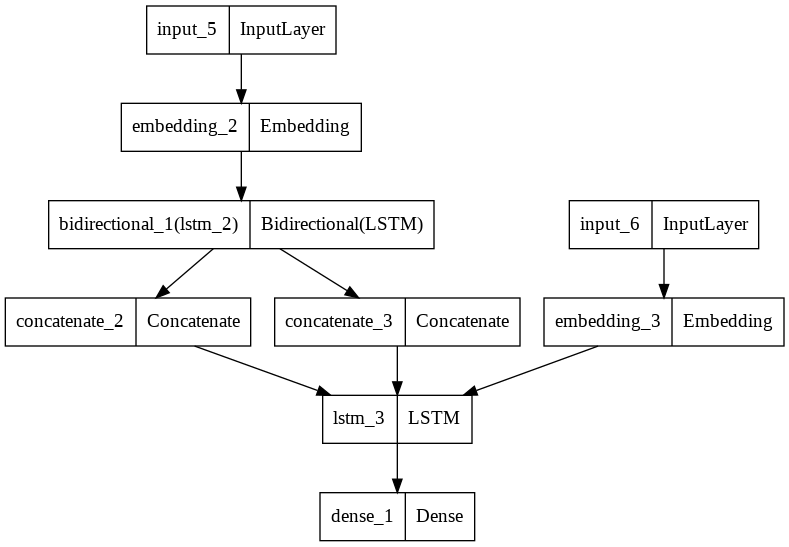

In [103]:
from tensorflow.keras.utils import plot_model
plot_model(model5)

In [104]:
model5.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, None, 512)    8488448     ['input_5[0][0]']                
                                                                                                  
 input_6 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 bidirectional_1 (Bidirectional  [(None, 512),       1574912     ['embedding_2[0][0]']            
 )                               (None, 256),                                               

In [105]:
y_train

array([[    1,   184,    32, ...,     0,     0,     0],
       [    1,  9725,    45, ...,     0,     0,     0],
       [    1,    58, 13375, ...,     0,     0,     0],
       ...,
       [    1,     4,    22, ...,     0,     0,     0],
       [    1,    53,   164, ...,     0,     0,     0],
       [    1, 11609,     5, ...,     0,     0,     0]], dtype=int32)

In [106]:
model5.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, None, 512)    8488448     ['input_5[0][0]']                
                                                                                                  
 input_6 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 bidirectional_1 (Bidirectional  [(None, 512),       1574912     ['embedding_2[0][0]']            
 )                               (None, 256),                                               

In [107]:
model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Callbacks

In [108]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("/content/model5/", monitor='val_accuracy')

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

callbacks_list = [checkpoint, early_stopping]

### Prepare input for encoder -decoder model

In [109]:
# Training
encoder_input_data = X_train
decoder_input_data = y_train[:,:-1]
decoder_target_data = y_train[:,1:]

# Testing
encoder_input_test = X_test
decoder_input_test = y_test[:,:-1]
decoder_target_test= y_test[:,1:]

In [110]:
history = model5.fit([encoder_input_data, decoder_input_data],decoder_target_data, 
                    epochs=3, 
                    batch_size=128,
                    validation_data = ([encoder_input_test, decoder_input_test],decoder_target_test ),
                     callbacks= callbacks_list)

Epoch 1/3
273/273 [==============================] - ETA: 0s - loss: 2.8671 - accuracy: 0.1981

INFO:tensorflow:Assets written to: /content/model5/assets


INFO:tensorflow:Assets written to: /content/model5/assets


273/273 [==============================] - 119s 386ms/step - loss: 2.8671 - accuracy: 0.1981 - val_loss: 2.5628 - val_accuracy: 0.2483
Epoch 2/3
273/273 [==============================] - ETA: 0s - loss: 2.4133 - accuracy: 0.2700

INFO:tensorflow:Assets written to: /content/model5/assets


INFO:tensorflow:Assets written to: /content/model5/assets


273/273 [==============================] - 101s 372ms/step - loss: 2.4133 - accuracy: 0.2700 - val_loss: 2.4109 - val_accuracy: 0.2839
Epoch 3/3
273/273 [==============================] - ETA: 0s - loss: 2.2255 - accuracy: 0.3048

INFO:tensorflow:Assets written to: /content/model5/assets


INFO:tensorflow:Assets written to: /content/model5/assets


273/273 [==============================] - 101s 371ms/step - loss: 2.2255 - accuracy: 0.3048 - val_loss: 2.3206 - val_accuracy: 0.3089


In [111]:
model5.save_weights("/content/model5")

# inference Model

In [112]:
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding
from tensorflow.keras import Input, Model

In [113]:
encoder_model = Model(encoder_input, encoder_states)

In [114]:
decoder_state_input_h = Input(shape=(512,))
decoder_state_input_c= Input(shape=(512,))
decoder_states_input= [decoder_state_input_h, decoder_state_input_c]

dec_embd2 = decoder_embd(decoder_input)

decoder_output2,state_h2, state_c2 = decoder_lstm(dec_embd2, initial_state=decoder_states_input)
deccoder_states2= [state_h2, state_c2]

decoder_output2 = decoder_dense(decoder_output2)

decoder_model = Model(
                      [decoder_input]+decoder_states_input,
                      [decoder_output2]+ deccoder_states2)

#### Converting predicted numbers into text

In [115]:
def get_predicted_sentence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = mar_word_index['sos']
    
    # Sampling loop for a batch of sequences

    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        if sampled_token_index==0:
          break
        else:   
         # convert max index number to marathi word
         sampled_char = mar_index_word[sampled_token_index]
        # aapend it ti decoded sent
        decoded_sentence += ' '+sampled_char
        
        # Exit condition: either hit max length or find stop token.
        if (sampled_char == 'eos' or len(decoded_sentence) >= 37):
            stop_condition = True
        
        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        
        # Update states
        states_value = [h, c]
    
    return decoded_sentence

In [116]:
def get_marathi_sentence(sequence):
  sentence=""
  for i in sequence:
    if ((i != 0 and i != mar_word_index['sos']) and i != mar_word_index['eos']):
      sentence = sentence + mar_index_word[i]+' '
  return sentence

def get_eng_sent(sequence):
    sentence =''
    for i in sequence:
      if(i!=0):
        sentence = sentence + eng_index_word[i]+' '
    return sentence       

In [117]:
for i in range(20):
  print("English sentence:",get_eng_sent(X_test[i]))
  print("Actual Marathi Sentence:",get_marathi_sentence(y_test[i]))
  print("Translated Marathi Sentence:",get_predicted_sentence(X_test[i].reshape(1,21))[:-4])
  print("\n")

English sentence: so a 12 year old girl raises her hand and says 
Actual Marathi Sentence: इस पर एक 12 वर्ष की लड़की ने अपना हाथ उठाया और बोली 
Translated Marathi Sentence:  और एक और एक और एक और एक और एक ही ह


English sentence: seem to be beautifully suited 
Actual Marathi Sentence: बहुत उपयुक्त हैं 
Translated Marathi Sentence:  तो एक ही एक ही


English sentence: is make a very simple electric motor 
Actual Marathi Sentence: कि हम एक साधारण सा बिजली का मोटर बनायेंगे। 
Translated Marathi Sentence:  एक एक एक एक कहानी है


English sentence: and the distribution of tens of millions 
Actual Marathi Sentence: और कई करोड 
Translated Marathi Sentence:  और एक दिन की तरह


English sentence: i have had classes that were so low 
Actual Marathi Sentence: मुझे ऐसी क्लासे पढाने को मिली हैं 
Translated Marathi Sentence:  मैं अपने पास एक और भी है


English sentence: it is a win win win situation 
Actual Marathi Sentence: यह सब के लिए फायदे का मामला है 
Translated Marathi Sentence:  यह एक छोटा रूप से 

In [118]:
model5.save("/content/model5.h5")

In [119]:
import tensorflow as tf


In [120]:
model_5=tf.keras.models.load_model("/content/model5.h5")